In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [34]:
Data_df = pd.read_csv('Dataset_3_Team_3.csv')

In [35]:
Data2_df = pd.read_csv('Dataset_3_Team_3.csv')

In [36]:
Data2_df

,# x_1,x_2,Class_label
0,-0.779573,0.398270,0
1,0.252290,-0.394026,1
2,-0.250315,-0.645048,1
3,0.975920,0.444398,0
4,0.036765,-1.017833,0
5,0.960677,-0.122052,0
6,0.302335,1.102372,0
7,-0.812172,-0.562510,0
8,0.338202,0.605678,1
9,0.628770,-0.226330,1


In [37]:
X = Data_df.values
X = X[:,0:2]

In [38]:
Y = Data_df.values
Y = Y[:,2]

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [40]:
y_train = y_train.reshape(1,-1)
y_test  = y_test.reshape(1,-1)

In [41]:
y_test2 = y_test.T

In [42]:
def sigmoid(a):
    s = 1/(1+np.exp(-1*a))
    return(s)

In [43]:
k = np.dot(X_train,X_train.T) + 1 #Linear Kernel
k = k.T

In [44]:
k.shape

(800, 800)

In [45]:
k_test = np.dot(X_test,X_train.T) + 1
k_test = k_test.T

In [46]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):    
    costs = []   
    for i in range(num_iterations):
        m = X.shape[1]
        A = sigmoid(np.dot(w.T,X)+b)
        dw = (1/m)*np.dot(X,(A-Y).T)
        db = (1/m)*np.sum(A-Y)
        w = w - learning_rate*dw
        b = b - learning_rate*db   
    params = {"w": w,
              "b": b}    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads

In [47]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X)+b)     
    for i in range(A.shape[1]):
        if A[0][i] <= 0.5 :
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [48]:
def model(k, y_train, k_test, y_test, num_iterations = 2000, learning_rate = 0.5):
    w = np.zeros((k.shape[0],1))
    b = 0
    parameters, grads = optimize(w, b, k, y_train, num_iterations, learning_rate)
    w = parameters["w"]
    b = parameters["b"]
    print(np.shape(k_test))
    Y_prediction_test =  predict(w, b, k_test)
    Y_prediction_train = predict(w, b, k)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))
    d = {
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [49]:
d = model(k, y_train, k_test, y_test, num_iterations = 20000, learning_rate = 0.5)

(800, 200)
train accuracy: 50.625 %
test accuracy: 51.0 %


In [67]:
counter = 0
y_pred_train = d['Y_prediction_train']
cm = np.zeros((2,2))
for i in range(y_train.shape[1]):
    cm[int(y_pred_train[0,i]),int(y_train[0,i])] += 1
    



In [68]:
cm

array([[  5.,   0.],
       [395., 400.]])

In [52]:
k_poly =  (np.dot(X_train,X_train.T) + 1) **3 #Polynomial Kernel of degree 3
k_poly = k_poly.T

In [53]:
k_poly.shape

(800, 800)

In [54]:
k_test_poly = (np.dot(X_test,X_train.T) + 1) **3 #Polynomial Kerenl of degree 3
k_test_poly = k_test_poly.T

In [55]:
k_test_poly.shape

(800, 200)

In [56]:
d2 = model(k_poly, y_train, k_test_poly, y_test, num_iterations = 1000, learning_rate = 0.5)

(800, 200)
train accuracy: 97.875 %
test accuracy: 98.0 %


In [57]:
con = np.zeros((2,2))
y_pred_train = d2['Y_prediction_train']
for i in range(y_train.shape[1]):
    con[int(y_pred_train[0,i]) ,int(y_train[0,i])] += 1
        

In [58]:
con

array([[393.,  10.],
       [  7., 390.]])

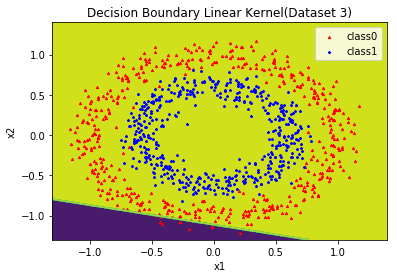

In [59]:
y1 = np.linspace(-1.3,1.4,num = 500) 
y2 = np.linspace(-1.3,1.4,num = 500) 
y1,y2 = np.meshgrid(y1,y2)
Y1 = y1.flatten()
Y2 = y2.flatten()
plot_arr = np.zeros((Y1.shape[0],2))
plot_arr[:,0] += Y1
plot_arr[:,1] += Y2
k_plot = np.dot(plot_arr,X_train.T)+1
k_plot = k_plot.T
Z = predict(d['w'],d['b'],k_plot)
Z = Z.T
Z = Z.reshape(y1.shape[0],y1.shape[1])
plt.contour(y1,y2,Z)
plt.contourf(y1,y2,Z)
D0 = Data2_df[Data2_df['Class_label']==0].values
D1 = Data2_df[Data2_df['Class_label']==1].values
plt.scatter(D0[:,0],D0[:,1],color="red",s=5,label="class0",marker='^')
plt.scatter(D1[:,0],D1[:,1],color="blue",s=5,label="class1",marker='*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Decision Boundary Linear Kernel(Dataset 3)')
plt.savefig('LR_LinerKernal')
plt.show()


In [60]:
Z.shape

(500, 500)

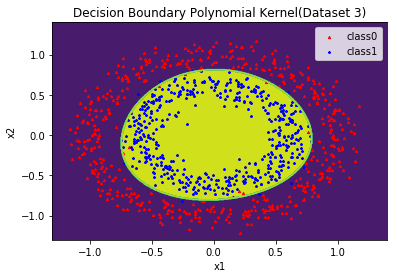

In [61]:
y1 = np.linspace(-1.3,1.4,num = 500) #for dataset2 replace by(-1.5,2.6,1) 
y2 = np.linspace(-1.3,1.4,num = 500) 
y1,y2 = np.meshgrid(y1,y2)
Y1 = y1.flatten()
Y2 = y2.flatten()
plot_arr = np.zeros((Y1.shape[0],2))
plot_arr[:,0] += Y1
plot_arr[:,1] += Y2
k_plot = (np.dot(plot_arr,X_train.T)+1)**3
k_plot = k_plot.T
Z = predict(d2['w'],d2['b'],k_plot)
Z = Z.T
Z = Z.reshape(y1.shape[0],y1.shape[1])
plt.contourf(y1,y2,Z)
plt.contour(y1,y2,Z)
D0 = Data2_df[Data2_df['Class_label']==0].values
D1 = Data2_df[Data2_df['Class_label']==1].values
plt.scatter(D0[:,0],D0[:,1],color="red",s=5,label="class0",marker='^')
plt.scatter(D1[:,0],D1[:,1],color="blue",s=5,label="class1",marker='*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Decision Boundary Polynomial Kernel(Dataset 3)')
plt.savefig('LR_PolyKernal')
plt.show()


In [62]:
d['Y_prediction_train'].shape

(1, 800)

In [63]:
y_train.shape

(1, 800)